# Avacado Project

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


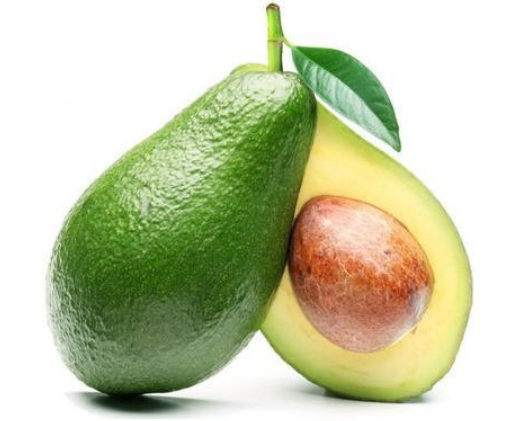

The dataset can be seen in two angles to find the region and find the average price .

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Average Price using regression

In [2]:
# Reading the csv file from dataset
df=pd.read_csv('avocado.csv')

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

From the above dataset we can see that there are 14 columns which contains both feature columns and one target variable. Here "Average Price" is the target variable which contains continuous data so it is a regression type problem. The dataset contains both numerical and categorical columns.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the price prediction of avocado, so I am dropping this column.

In [4]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

So here we have dropped a column unnamed.

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [6]:
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244  2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [7]:
df.sample()

Date  AveragePrice  Total Volume     4046    4225  4770  \
13581  2016-04-17          1.64       5604.81  2538.97  159.88   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year   region  
13581     2905.96     2905.96         0.0          0.0  organic  2016  Orlando

In [8]:
df.sample(3)

Date  AveragePrice  Total Volume       4046       4225    4770  \
53    2015-12-20          1.08     331377.53  251774.15   20702.45  103.06   
7945  2017-01-15          0.93     755537.27   88731.00  212640.40  894.17   
4100  2016-02-21          1.10     481704.97  244778.76  102684.81   78.30   

      Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
53      58797.87    46930.26    11867.61         0.00  conventional  2015   
7945   453271.70   442607.26    10132.02       532.42  conventional  2017   
4100   134163.10    48792.84    85370.26         0.00  conventional  2016   

                 region  
53              Atlanta  
7945            Seattle  
4100  MiamiFtLauderdale

In [9]:
df.shape

(18249, 13)

Shape of the dataset is:

Number of rows: 18249,
Number of columns: 13

In [10]:
# Checking the data types of the feature columns
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in the dataset contains three different types of data namely float, integer and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

# Feature engineering

In [11]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [12]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see the Date column has datetime data type. Now let's split this data into months and day.

In [13]:
df["Month"] = df["Date"].dt.month

In [14]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [15]:
df.drop("Date",axis=1,inplace=True)

In [16]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [17]:
# Again check the shape of the dataset
df.shape

(18249, 14)

There are 18249 rows and 14 columns. Here we have added two more columns from date.

In [18]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

Float data- 9, Integer data- 3, Object data- 2

In [20]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the number of unique values present in each columns.

In [21]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

It is clear that there are no null values present in the dataset.

<AxesSubplot:>

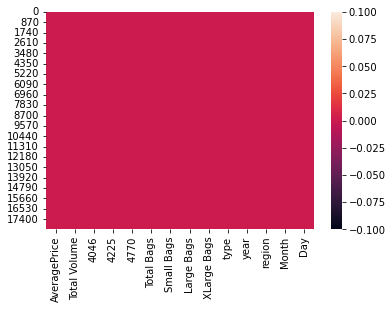

In [22]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

By visualizing also we can say there are no missing values. So our data is cleaned. Let's move further.

In [23]:
# Checking how many columns are there in the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

These are the columns present in dataset.

In [24]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the unique values present in the target variable.

In [25]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

This gives the list of values in the target variable which has int64 data type.

In [26]:
# Checking wheather the dataset contains any space
df.loc[df['AveragePrice']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

So from the above observation we can say there are no spaces present in the dataset.

# Statistical summary of Dataset

In [27]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

1.The counts of all the columns are same which means there are no null values present in the daaset.

2.The label Average Price has mean which is bit greater than median, that means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

3.The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

4.The mean is greater than the median in most of the columns which means they are skewed to right.

5.In some of the columns median is greater than the mean, featues are 4046, Total Bags and Small Bags, hence they are skewed to left.

6.Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

7.By looking at the difference between max and 75% (3rd quantile), we can say that there are outliers present in most of the column. We will remove this outliers in further steps.

Before visualizing the data let's separate the categorical and numerical columns.

In [28]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


These are the categorical columns that we have, we need to encode these columns using either label encoder or one hot encoder.

In [29]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


These are the numerical columns present in the dataset.

# Data Visualization

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


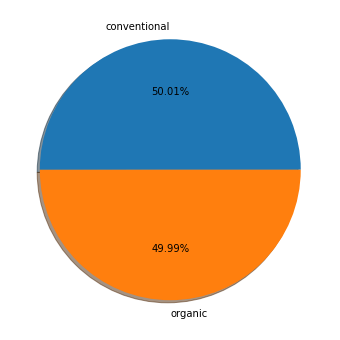

In [30]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


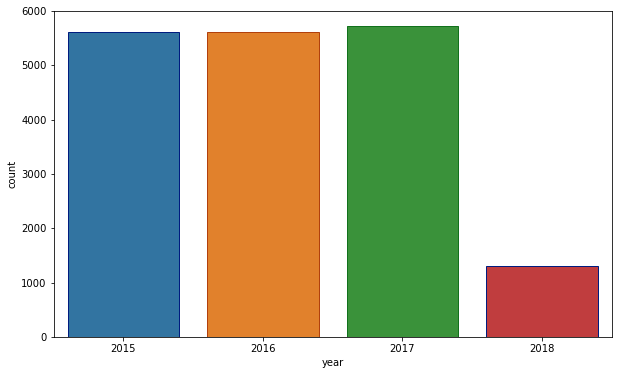

In [31]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year

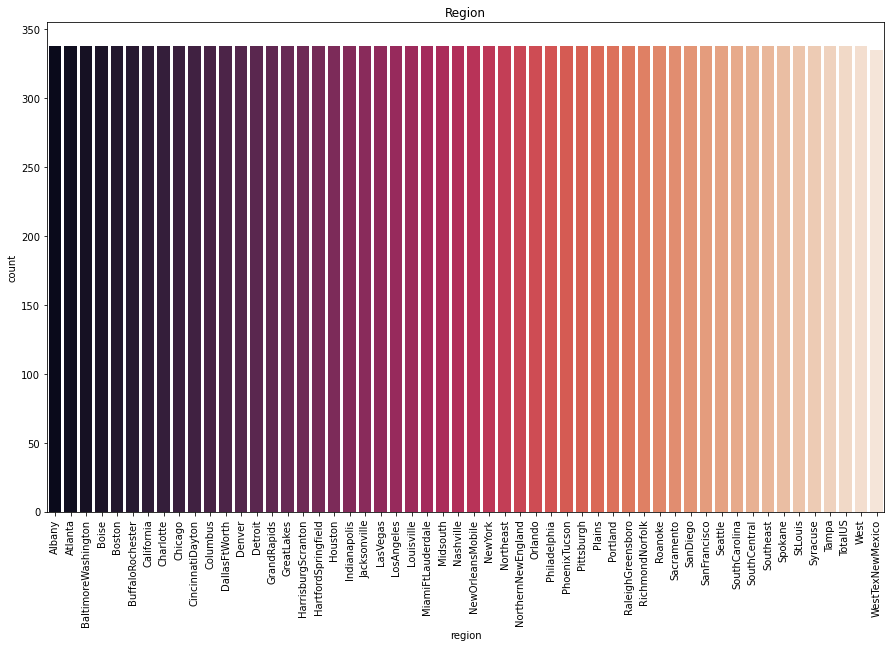

In [32]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

Let's plot the distribution plot to know how the data has been distributed in all the columns.

# Distribution of skewness

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


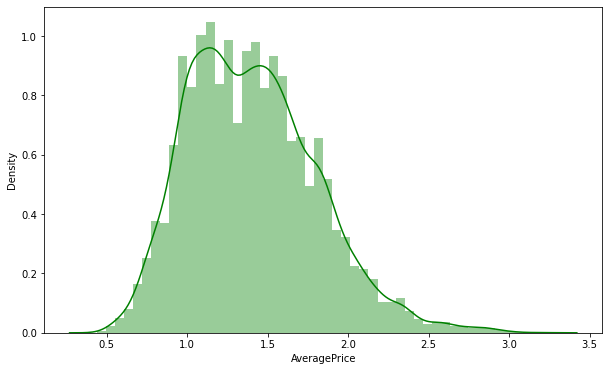

In [33]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

Here we can infer that the data is normally distributed in the label. Also the price of the avocado is more between 1.15 - 1.5.



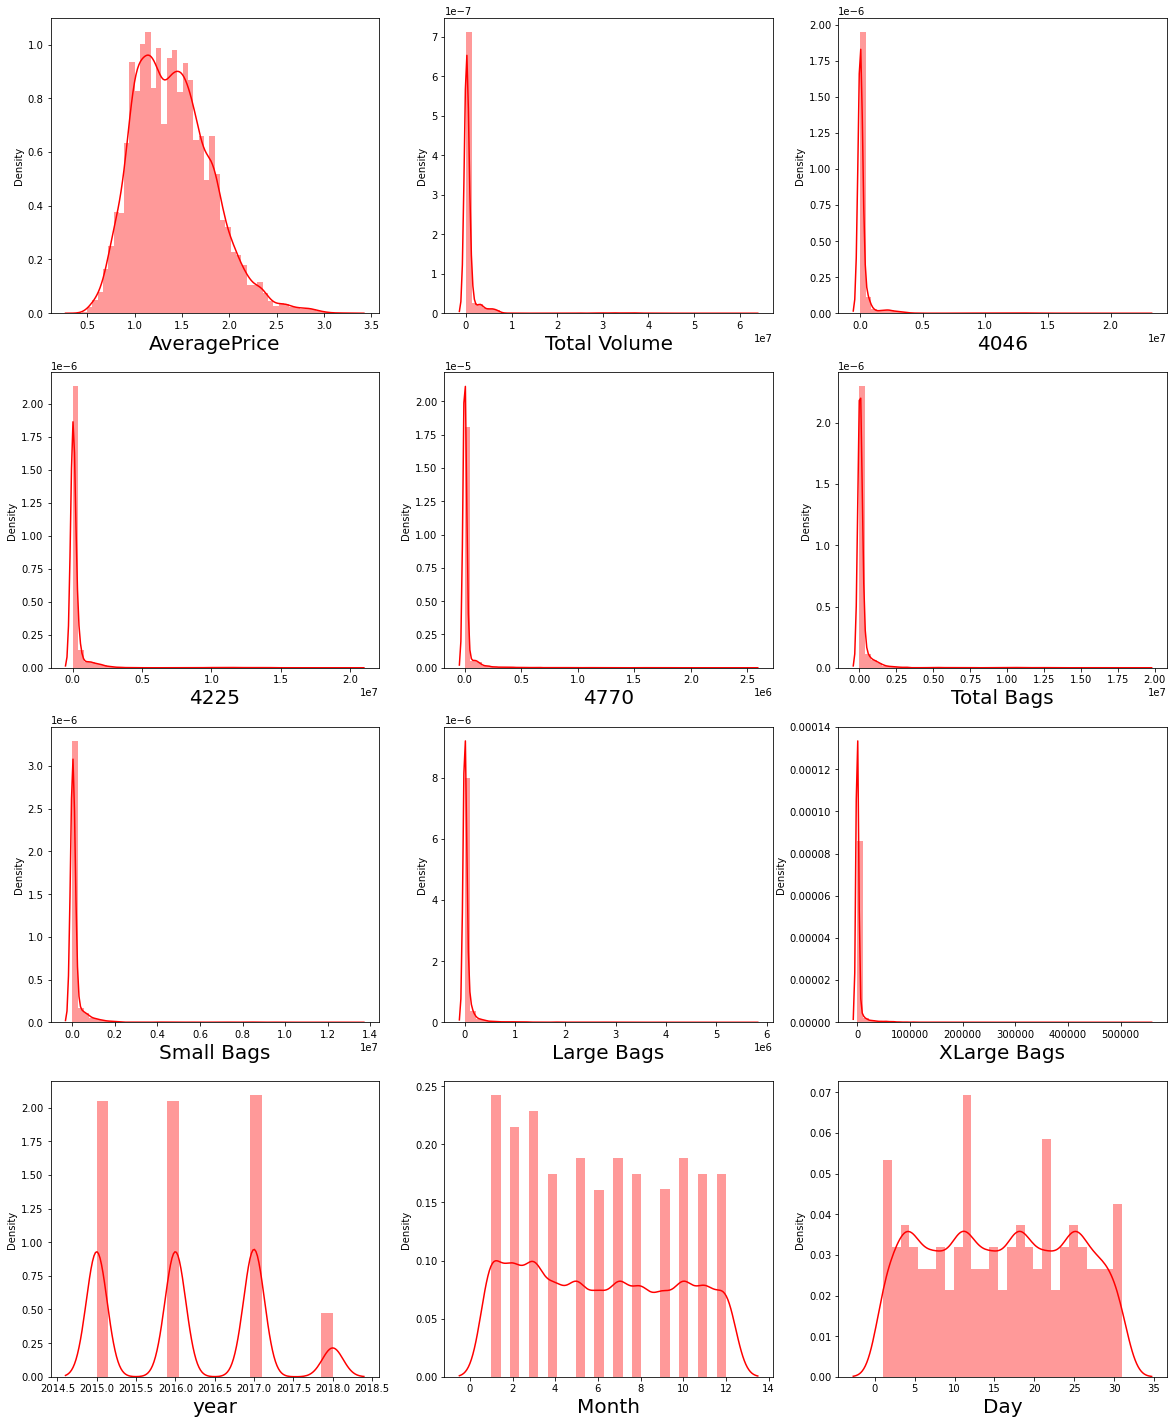

In [34]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to right, which means, mean is more than the median in these columns.

# Bivariate Analysis

# Comparision between year and AveragePrice

Text(0, 0.5, 'AveragePrice')

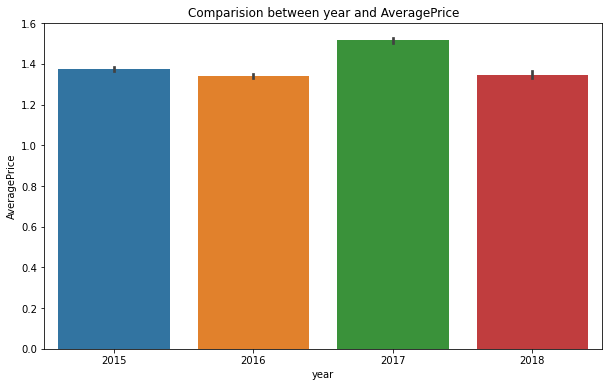

In [35]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.

# Relationship between Average Price and Month

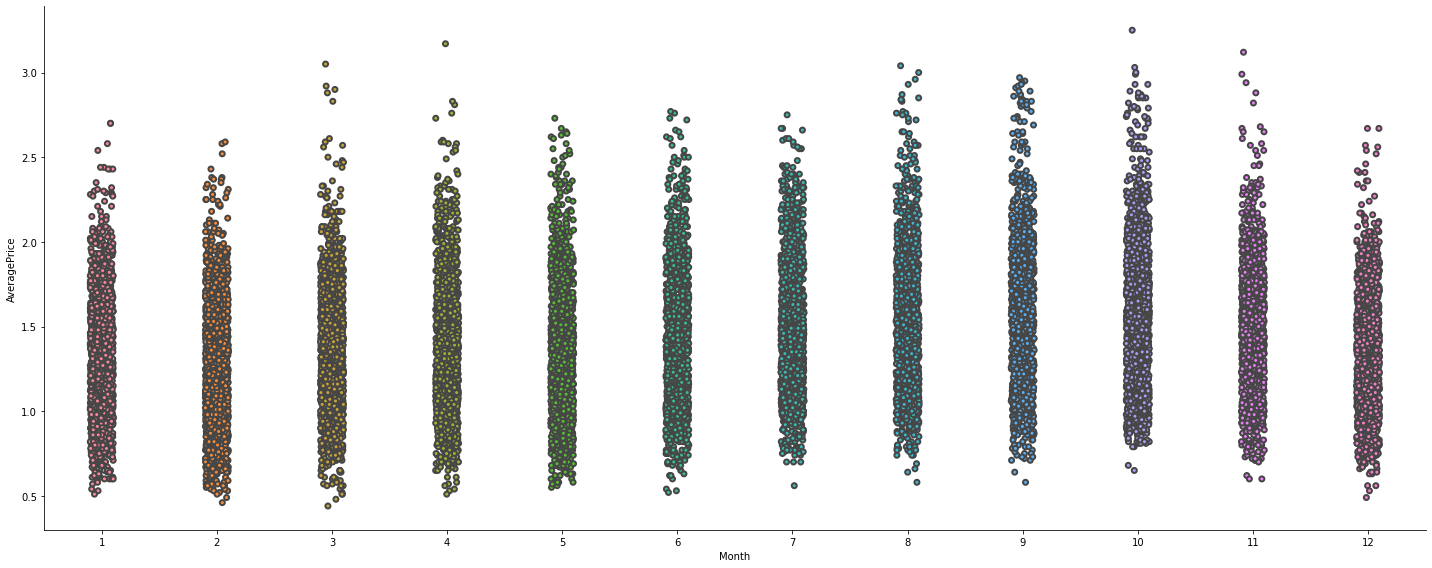

In [36]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

Looking at the plot we can observe the Average Price remains high during August(8th month), September(9th month) and October and starts to drop from November onwards. Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

# Relationship between year and Total volume

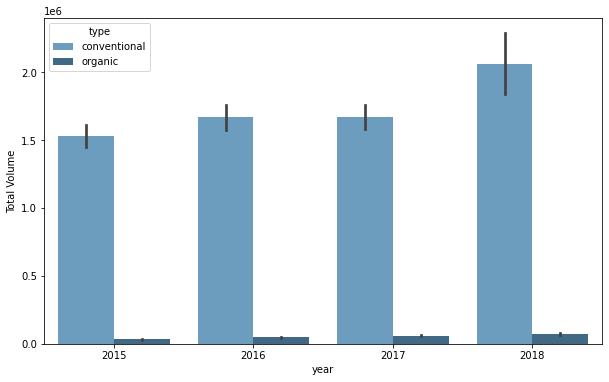

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.

# Relationship between Month and Average Price

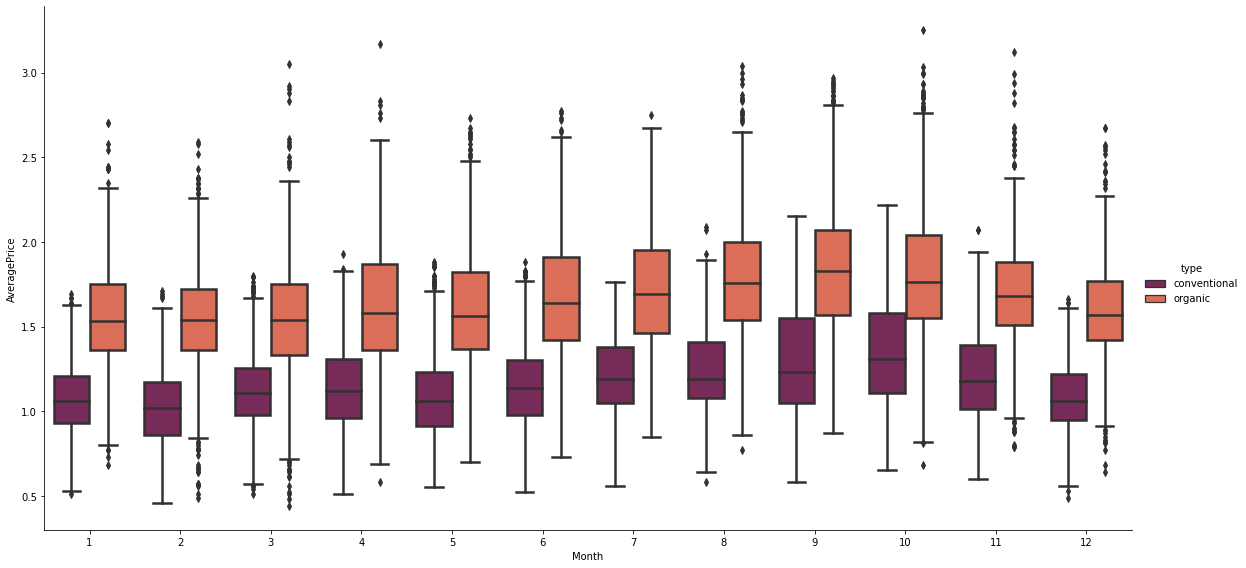

In [38]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April ,June and July.

# Relationship between Total volume and Avarage Price

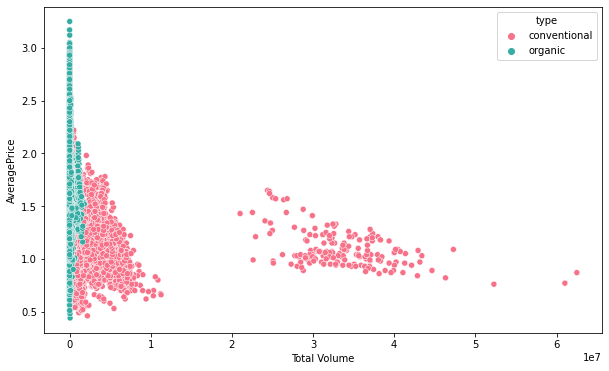

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

The scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. So the Average Price of the oraganic type with zero volume is more than the conventional type.

# Comparision between PLU sold vs Day

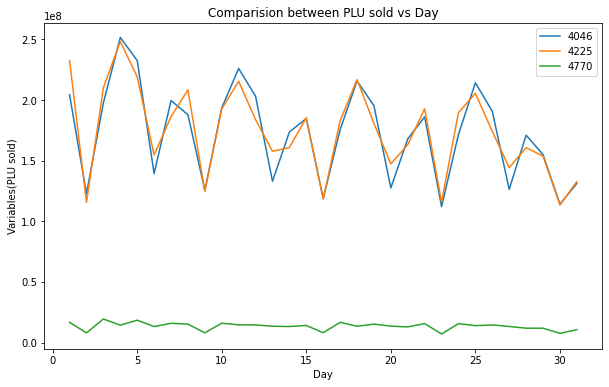

In [40]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4770 was sold in all the day and the avocados with PLU 4225 and PLU 4046 was sold all time high.

# Comparision between type of bags sold vs year

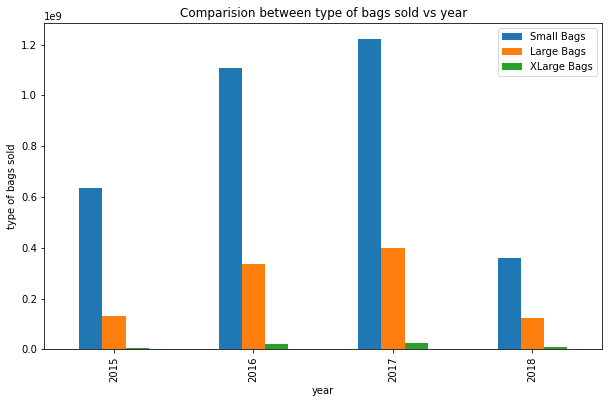

In [41]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

# Average Price in each region with year

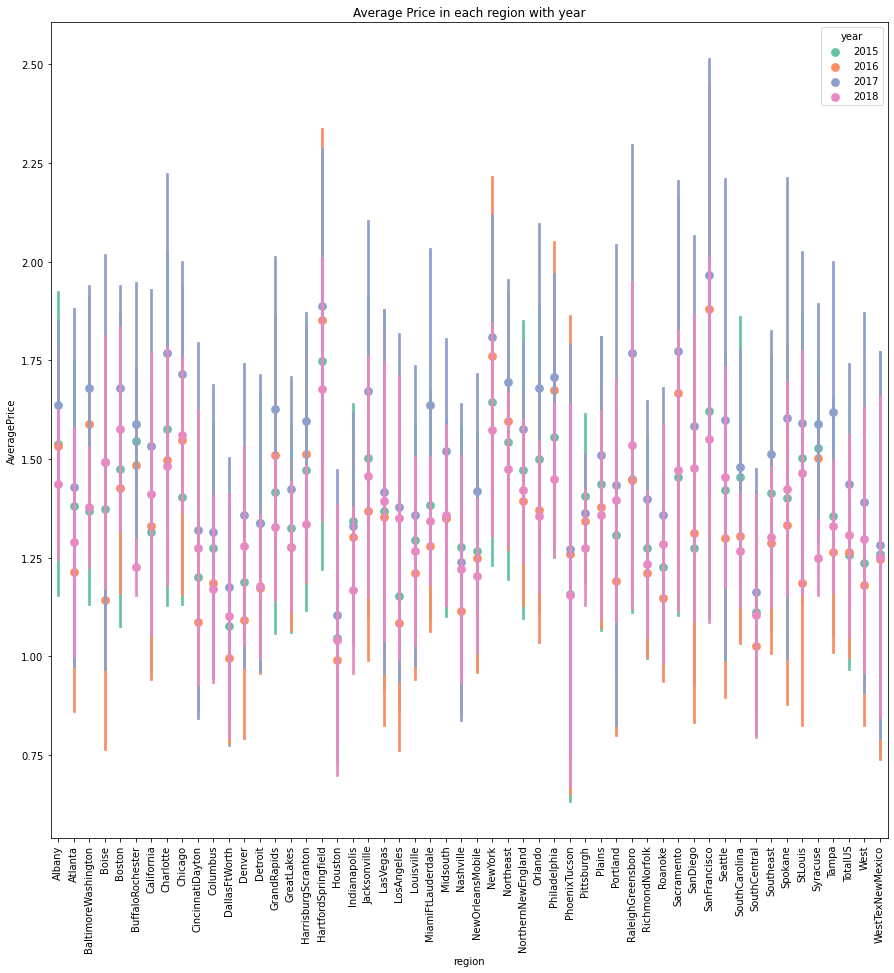

In [42]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

# Comparision between Day and AveragePrice

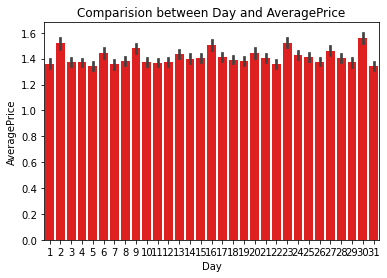

In [45]:
# plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.barplot(df['Day'],df['AveragePrice'],color="r");
plt.show()

The average price of the avocado is high in almost all the days and less in 5th, 22nd and 31st day of the month.

# Comparision between type of bags sold vs year

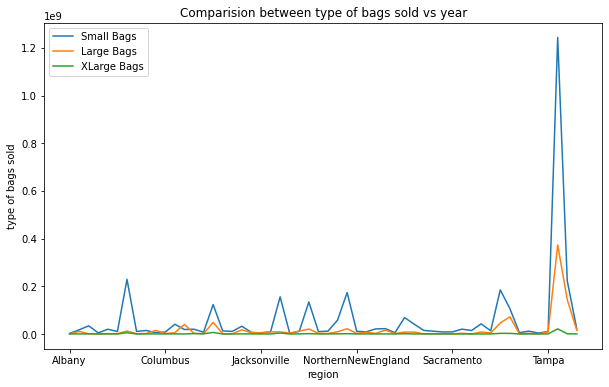

In [47]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.

# Comparision between Total Bags and Total Volume

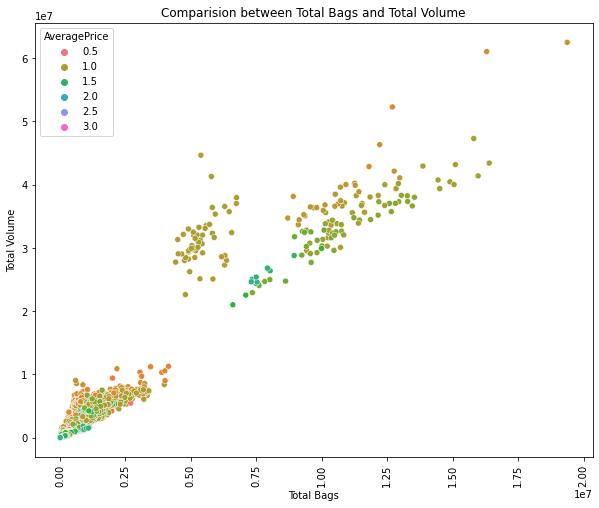

In [48]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

# Comparision between Small Bags sold vs AveragePrice

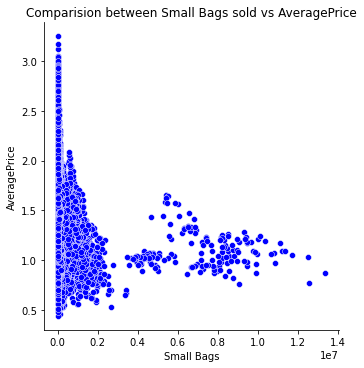

In [49]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

# Comparision between the PLU 4046 and PLU 4225

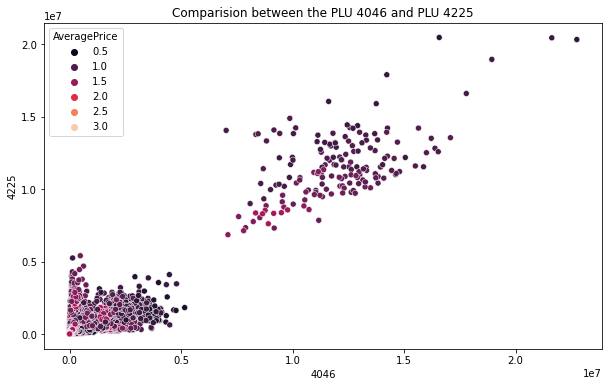

In [50]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph. These scatter plots can also be observed in the pairplot.

I have tried almost all the plotting techniques to get the best pattern, thinking that above plots are good to compare the relationship between the columns. To know more about the relationship between the features I will plot pairplot which is also a kind of scatterplot.

# Multivariate Analysis


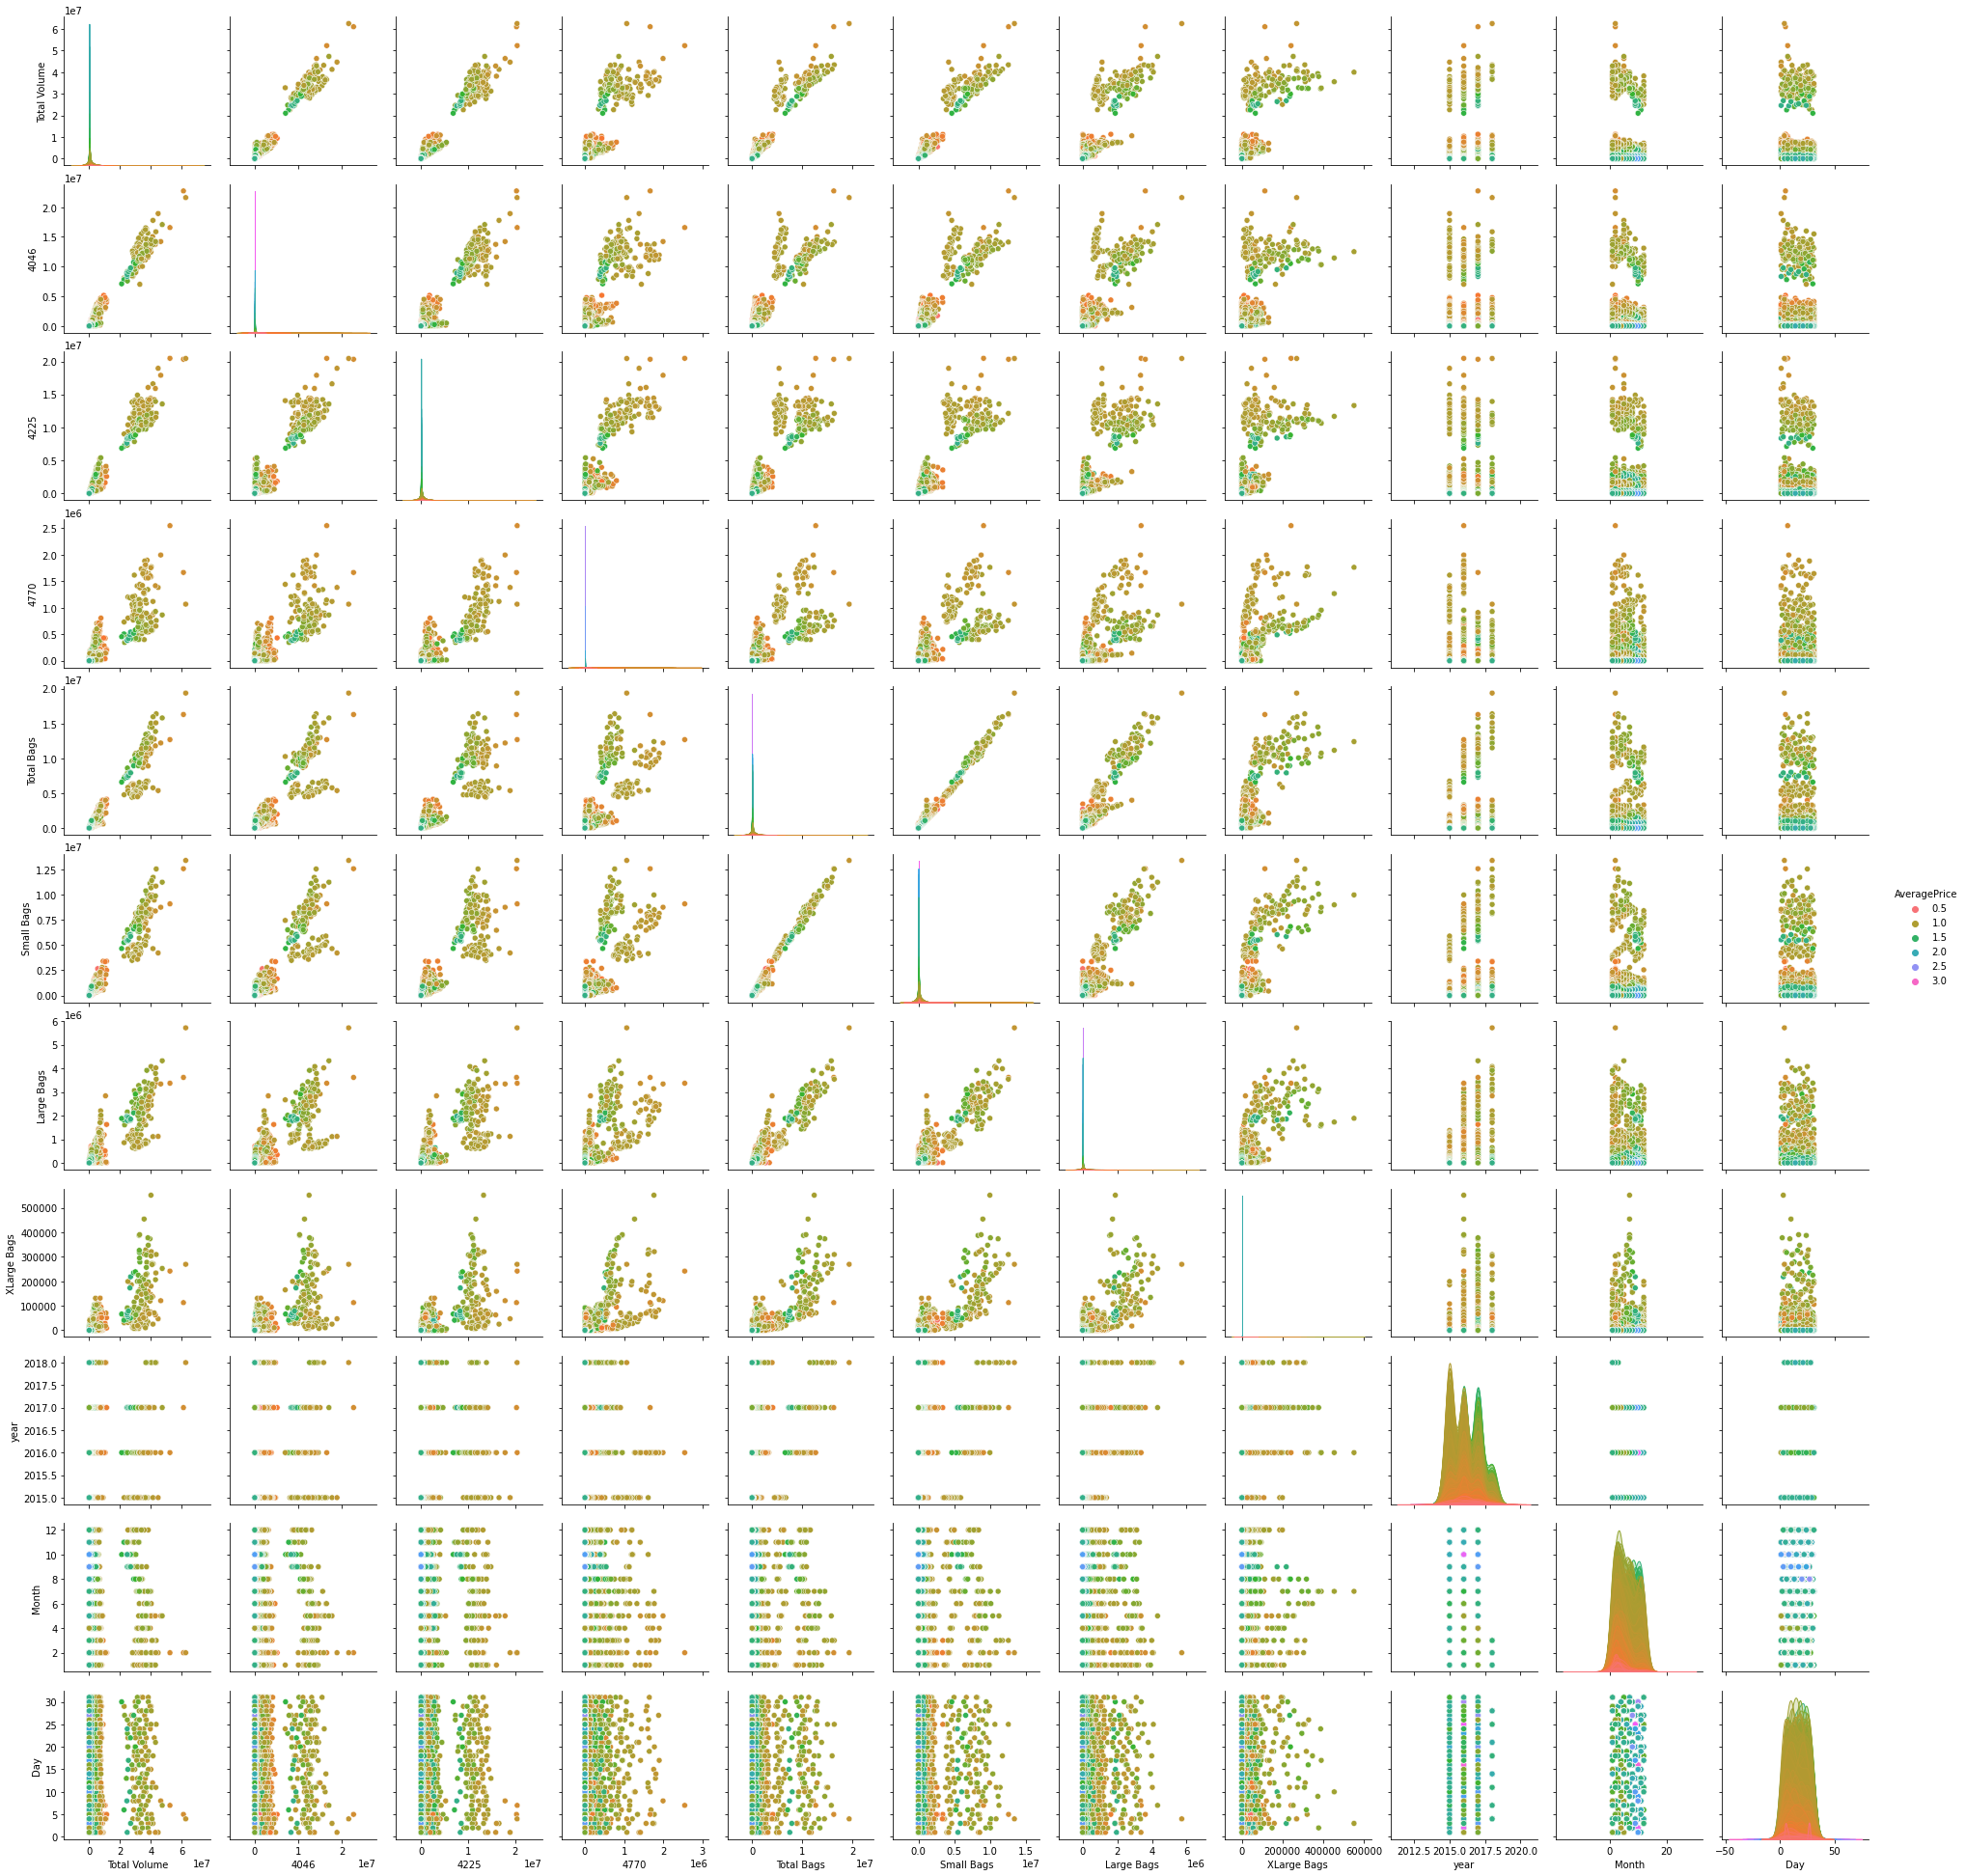

In [51]:
sns.pairplot(df,hue="AveragePrice",palette="husl")


This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

1.From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

2.Here we can infer that linear relationship exists in most of the columns and others have no much relationship with each other.

3.We can also notice the correlation between the features and some columns have outliers which we will remove using appropriate methods. Day column is highly correlated with all the other features.

# Identifying the outliers


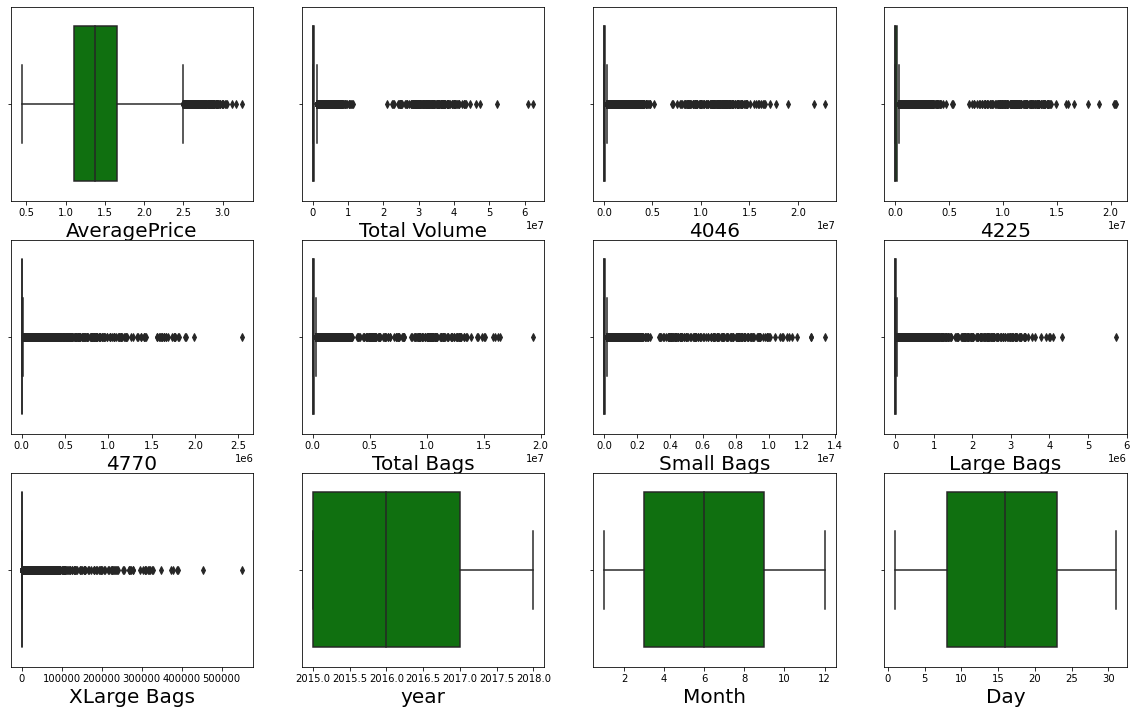

In [64]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

# Removing outliers

# 1.Zscore method

In [52]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [53]:
# Features containing outliers
feature_cols = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [54]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

Now the outliers have been removed.

In [55]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [56]:
# Shape of original dataset
df.shape

(18249, 14)

Original dataset contains 18249 rows and 14 columns

In [57]:
# Shape of new dataframe
new_df.shape

(17782, 14)

after Removing outliers dataset contains 17782 rows and 14 columns

In [58]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

Here we are loosing 2.5% data which is less than 10%

# 2. IQR (Inter Quantile Range) method

In [59]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
df1.shape

(11747, 14)

the dataset contains 11747 rows and 14 columns after outliers removal

In [61]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss

35.62934955340019

Using IQR method the data loss is 35.62% which is not feasible, So i am considering Z score method

# Checking for skewness

In [62]:
# Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

All the columns have skewness except year, Month and Day. AveragePrice is our label so no need to remove skewness in this column.

# Removing skewness using yeo-johnson method

In [63]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [64]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()


Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [65]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

After using yeo-johnson method the skewness is still present in XLarge Bags, Let's remove skewness using log transformation.

In [66]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

The skewness has been removed, now let's check it.

In [67]:
# Let's check the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [68]:
f1=["XLarge Bags"]
new_df[f1] = scaler.fit_transform(new_df[f1].values)

In [69]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Finally the skewness removed from all columns.

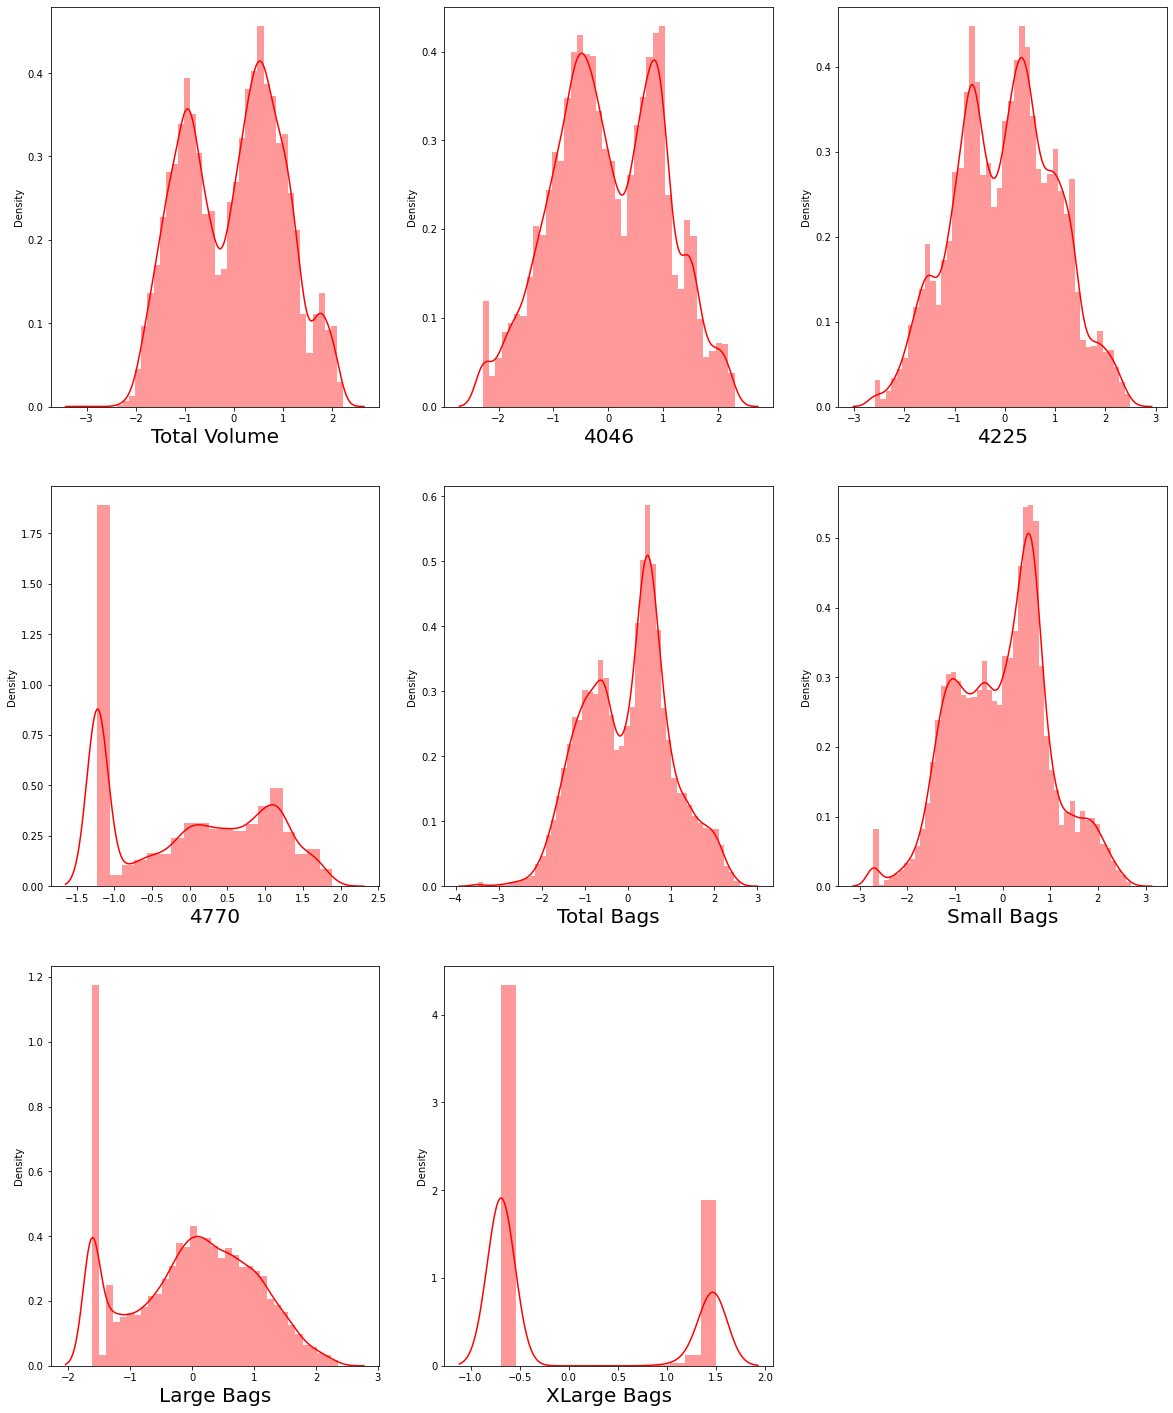

In [70]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal compare to previous data and the skewness is also removed.

# Encoding the categorical columns using Label Encoding

In [71]:
categorical_col = ["type","region"]

In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [73]:
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

These are the data's after encoding the categorical features using label encoder.

# Correlation between the target variable and independent variables using HEAT map

In [74]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.393528      0.627310  0.573589  0.580290  0.615107   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.393528  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.627310 -0.800828   
4046            0.799354    0.778765    0.601899     0.573589 -0.725826   
4225            0.818511    0.784901    0.614878     0.580290 -0.747722   
4770            0.761641    0.754305    0.548457     0.615107 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.609370 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.597809 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.449473 -0.500026   
XLarge Bags     0.609370    0.597809    0.449473     1.000000 -0.673864   
type           -0.725686   -0.720466   -0.500026    -0.673864  1.000000   
year            0.210924    0.185955    0.190295     0.153607  0.007399   
region          0.065996    0.051985    0.086573    -0.015786  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.022063 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.011528 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.153607 -0.015786  0.022063  0.011528  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

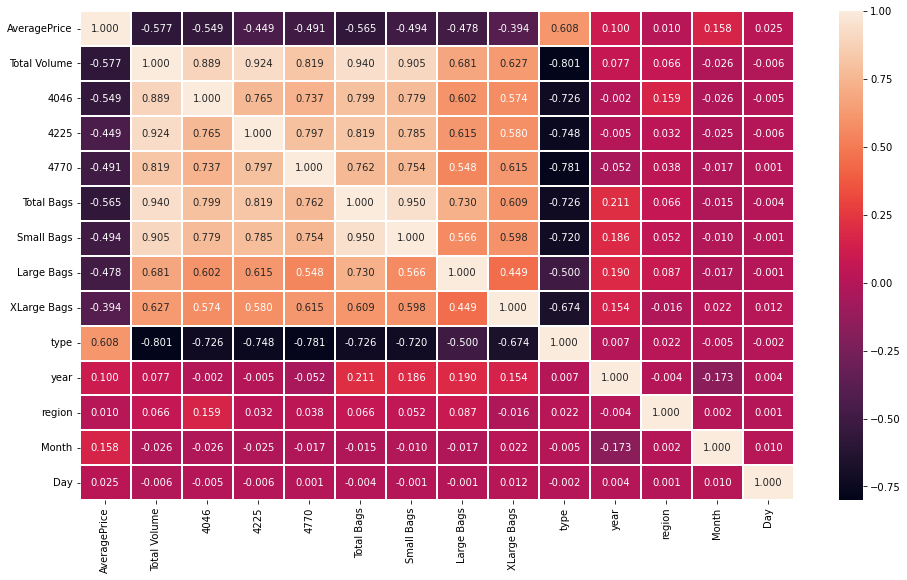

In [75]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

1.This heat map contains both positive and negative correlation.

2.Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

3.The features 'Day' and 'region' have no relation with the target so we can drop these columns.

4.Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

5.Also most of the columns have no relation with each other and have zero correlation.

In [76]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

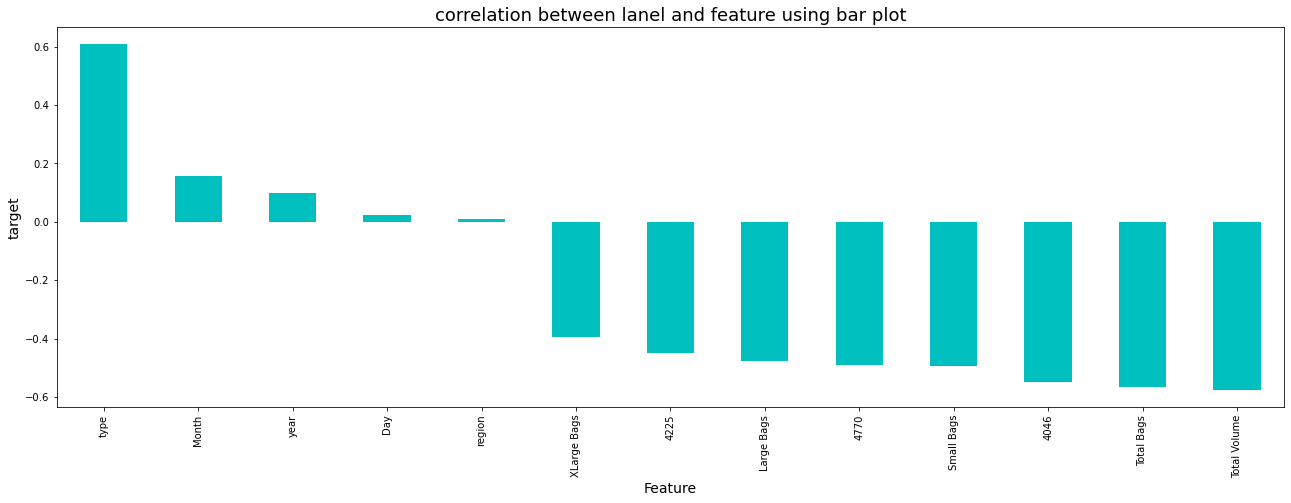

In [77]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region,Day and XLarge Bags have very less correlation with the target so we can drop these columns.

In [78]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("Day",axis=1, inplace=True)


In [79]:
new_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  Month  
0   -0.337064   -0.775214    -0.689355     0  2015     12  
1   -0.301038   -0.765237    -0.689355     0  2015     12  
2   -0.364044   -0.752534    -0.689355     0  2015     12  
3   -0.500341   -0.693012    -0.689355     0  2015     12  
4   -0.479918   -0.600755    -0.689355     0  2015     11

This is the dataframe after removing irrelevant columns.

Separating the features and label variables into x and y

In [80]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

In [81]:
x.shape

(17782, 11)

In [82]:
y.shape

(17782,)

In [83]:
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  type  year  Month  
0   -0.775214    -0.689355     0  2015     12  
1   -0.765237    -0.689355     0  2015     12  
2   -0.752534    -0.689355     0  2015     12  
3   -0.693012    -0.689355     0  2015     12  
4   -0.600755    -0.689355     0  2015     11

# Standard Scalarization

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year     Month  
0       -0.775214    -0.689355 -1.026443 -1.214908  1.641434  
1       -0.765237    -0.689355 -1.026443 -1.214908  1.641434  
2       -0.752534    -0.689355 -1.026443 -1.214908  1.641434  
3       -0.693012    -0.689355 -1.026443 -1.214908  1.641434  
4       -0.600755    -0.689355 -1.026443 -1.214908  1.358706  
...           ...          ...       ...       ...       ...  
17777   -0.405895    -0.689355  0.974238  1.979143 -1.185845  
17778   -0.478556    -0.689355  0.974238  1.979143 -1.468572  
17779   -0.945246    -0.689355  0.974238  1.979143 -1.468572  
17780   -0.910471    -0.689355  0.974238  1.979143 -1.468572  
17781   -1.042930    -0.689355  0.974238  1.979143 -1.468572  

[17782 rows x 11 columns]

I have scaled data now. Since we have multicollinearity problem, so let's use VIF factor to find it out.

# Checking VIF values to solve multicollinearity

In [85]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    51.789292  Total Volume
1     6.807519          4046
2    11.152868          4225
3     3.949559          4770
4    34.442606    Total Bags
5    16.627550    Small Bags
6     3.462158    Large Bags
7     2.060084   XLarge Bags
8     3.737836          type
9     1.384954          year
10    1.054119         Month

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags and  Small Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [86]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [87]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values     Features
0    3.546357         4046
1    4.271902         4225
2    3.934152         4770
3   24.478842   Total Bags
4   16.627339   Small Bags
5    3.418892   Large Bags
6    2.049154  XLarge Bags
7    3.505437         type
8    1.382351         year
9    1.051941        Month

The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [88]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [89]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values     Features
0    3.527422         4046
1    4.127445         4225
2    3.933876         4770
3    4.097433   Small Bags
4    1.864166   Large Bags
5    2.048999  XLarge Bags
6    3.502417         type
7    1.358047         year
8    1.051316        Month

The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

In [90]:
# DataFrame after preprocessing and data cleaning
x.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.649918  0.358278 -0.212550   -0.337064   -0.775214    -0.689355   
1 -0.770067  0.276355 -0.165117   -0.301038   -0.765237    -0.689355   
2 -0.724508  0.656010  0.034215   -0.364044   -0.752534    -0.689355   
3 -0.625017  0.475615 -0.110976   -0.500341   -0.693012    -0.689355   
4 -0.677083  0.268966 -0.100289   -0.479918   -0.600755    -0.689355   

       type      year     Month  
0 -1.026443 -1.214908  1.641434  
1 -1.026443 -1.214908  1.641434  
2 -1.026443 -1.214908  1.641434  
3 -1.026443 -1.214908  1.641434  
4 -1.026443 -1.214908  1.358706

# Best Model Building

# Finding best random state

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8667367301236703  on Random_state  49


I am getting maximum R2 score 87% on the basis of Random state 49.

# Creating new train test split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [94]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Random Forest Regressor

In [95]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8691839396559599
MAE: 0.1022614245548266
MSE: 0.021576063649484535
RMSE: 0.1468879288760126
Cross_Validaton_Score 0.19564437799116674


The R2 score of Random forest regressor is 87%

# Support Vector Machine Regressor

In [96]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7774437774696479
MAE: 0.14012201467212856
MSE: 0.03670716890781592
RMSE: 0.19159115039013655
Cross_Validaton_Score 0.1792390472947601


The R2 score using SVR model is 78%.

# Linear Regression

In [97]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.512006473303807
MAE: 0.2184172823448255
MSE: 0.08048690172172106
RMSE: 0.2837021355607339
Cross_Validaton_Score 0.09233981189340187


The R2 score for Linear Regressor is 51%.

# Stochastic Gradient Descent Regressor

In [98]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5108999970351762
MAE: 0.21876820421313364
MSE: 0.08066939768082453
RMSE: 0.2840235864867996
Cross_Validaton_Score 0.10922559136082655


The R2 score for SGDRegressor is 51%.

# KNeighbors Regressor

In [99]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8667367301236703
MAE: 0.10461968134957825
MSE: 0.02197969259606373
RMSE: 0.14825549769254337
Cross_Validaton_Score 0.07757218199798104


The R2 score using KNN regressor is 87%.

# GradientBoosting Regressor

In [100]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7137083935080477
MAE: 0.16326615649486728
MSE: 0.0472193238944683
RMSE: 0.2173000779900189
Cross_Validaton_Score 0.35313092319071726


The R2 score using GradientBoosting Regressor regressor is 71%.

From the difference between R2 score and Cross Validation Score we can conclude that KNeighbors Regressor as our best fitting model.

# Hyperparameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}

In [104]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [106]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [107]:
avocado =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado.fit(x_train, y_train)
pred = avocado.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.1468879288760126
R2_Score: 88.44140564228945


After tuning the R2 score of the model is increasing and is giving 88% which is good.

# Saving the model

In [108]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado,"Avocado_price.pkl")

['Avocado_price.pkl']

# Predicting the saved model

In [109]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.25648626, 1.81093301, 1.81492889, ..., 1.56387495, 1.51822651,
       1.30146292])

These are the predicted average price of the avocado.

In [110]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2         3         4         5     \
Predicted  1.256486  1.810933  1.814929  0.993868  1.189726  1.217015   
Original   1.190000  1.880000  1.820000  1.040000  1.100000  1.280000   

               6         7         8         9     ...      5325      5326  \
Predicted  1.272608  1.550866  1.503415  0.918251  ...  1.111305  1.566184   
Original   1.020000  1.350000  1.410000  0.860000  ...  0.910000  1.560000   

               5327      5328      5329      5330      5331      5332  \
Predicted  1.805583  1.975006  1.493318  1.755773  0.721647  1.563875   
Original   1.730000  2.310000  1.470000  1.660000  0.700000  1.540000   

               5333      5334  
Predicted  1.518227  1.301463  
Original   1.600000  1.410000  

[2 rows x 5335 columns]

We can observe both original and predicted values are almost same.

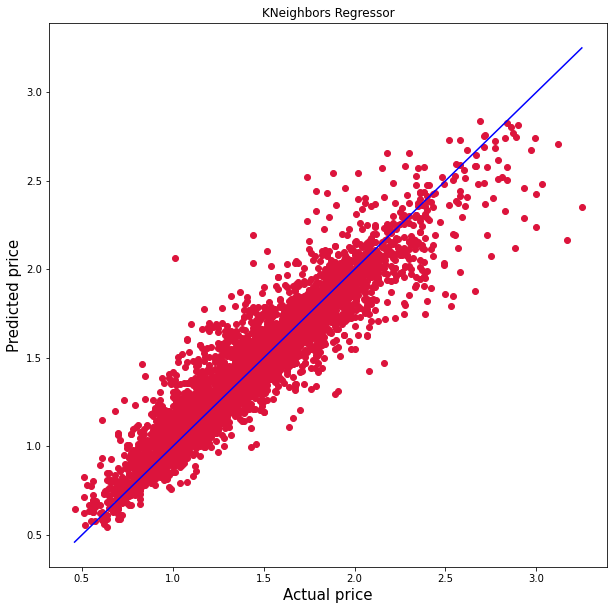

In [111]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

Plotting Actual price vs Predicted price. Here the blue line represents the actual price and red dots are the predicted price.

# 2.Classification Problem- Region

In [2]:
# Reading the csv file from dataset
df = pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Dropping irrelevant column unnamed

In [3]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [5]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [6]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [7]:
df["Month"] = df["Date"].dt.month

In [8]:
df["Day"] = df["Date"].dt.day

In [9]:
df.drop("Date",axis=1,inplace=True)

In [10]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [11]:
# Checking the uniqueness of target variable
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [12]:
# List of values in the target variable
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [13]:
# Checking wheather the dataset contains any space
df.loc[df['region']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

In [14]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [15]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

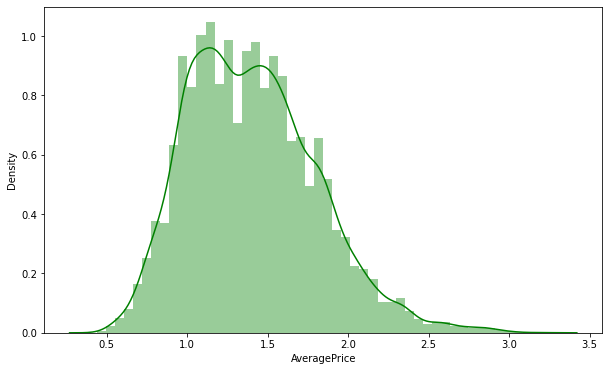

In [16]:
# Distribution plot for target variable "region"
print(df["region"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

Our target variable is normally distributed.

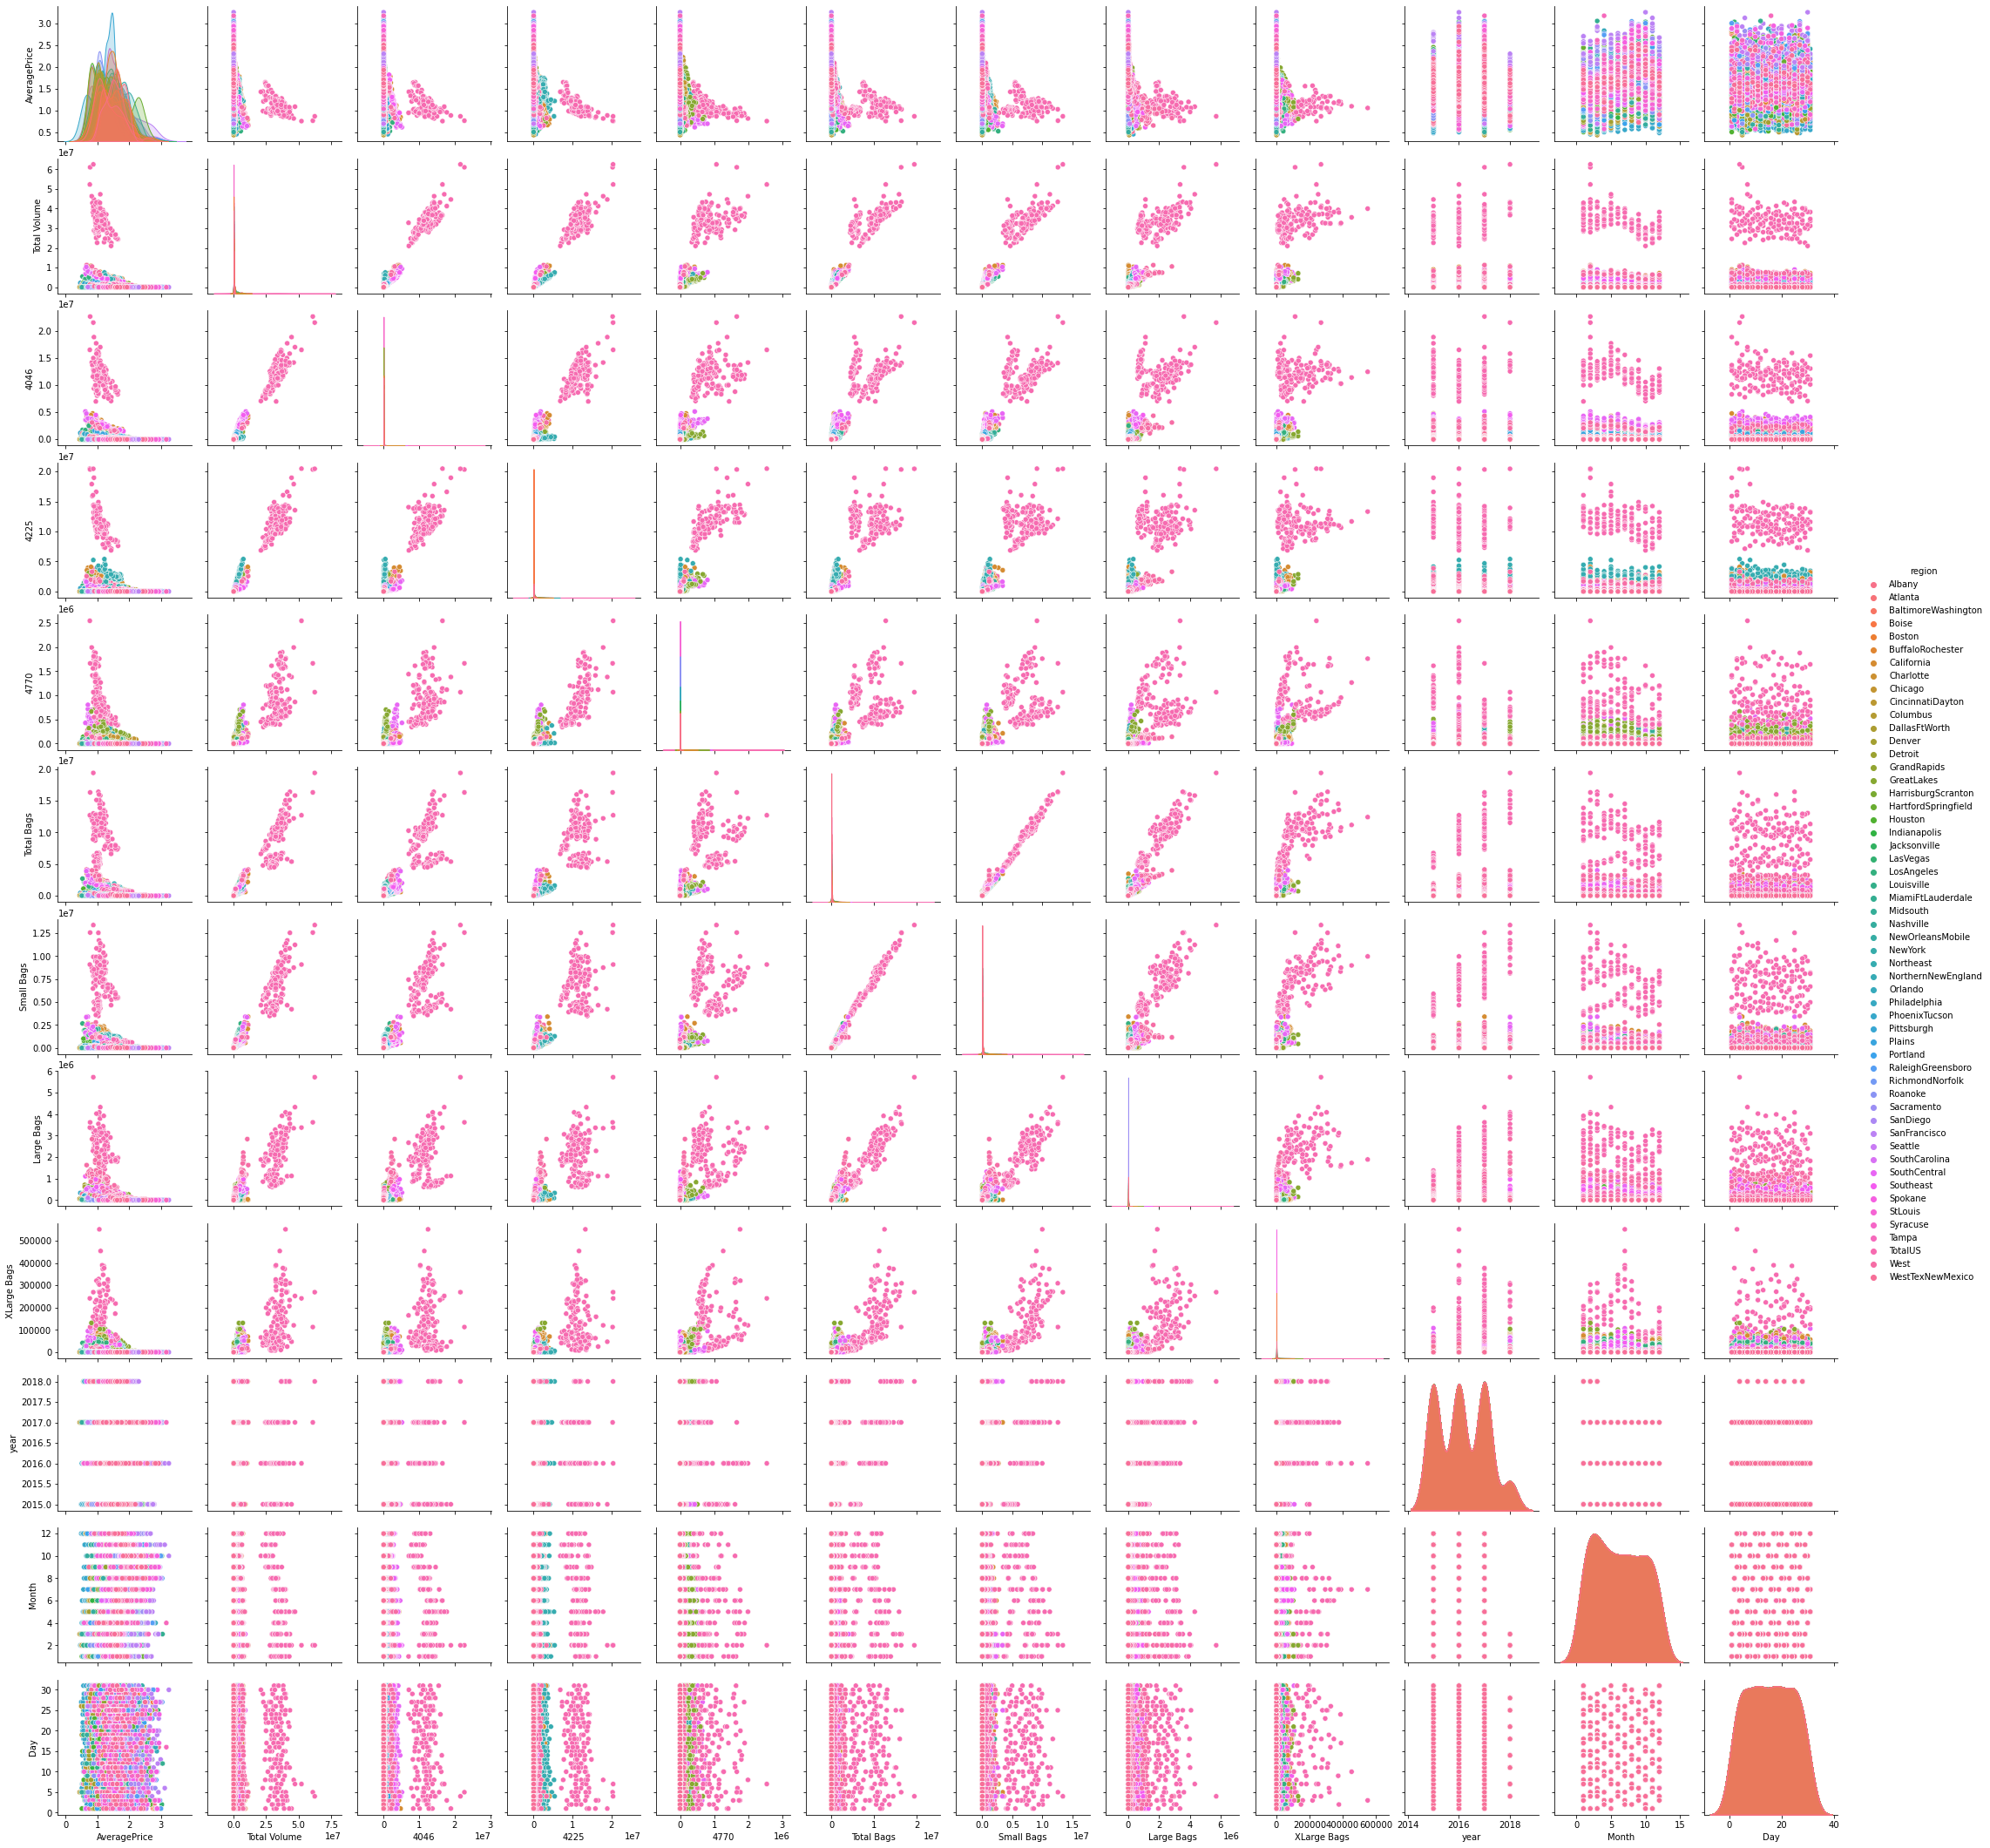

In [17]:
sns.pairplot(df,hue="region",palette="husl")

# Identifying the outliers

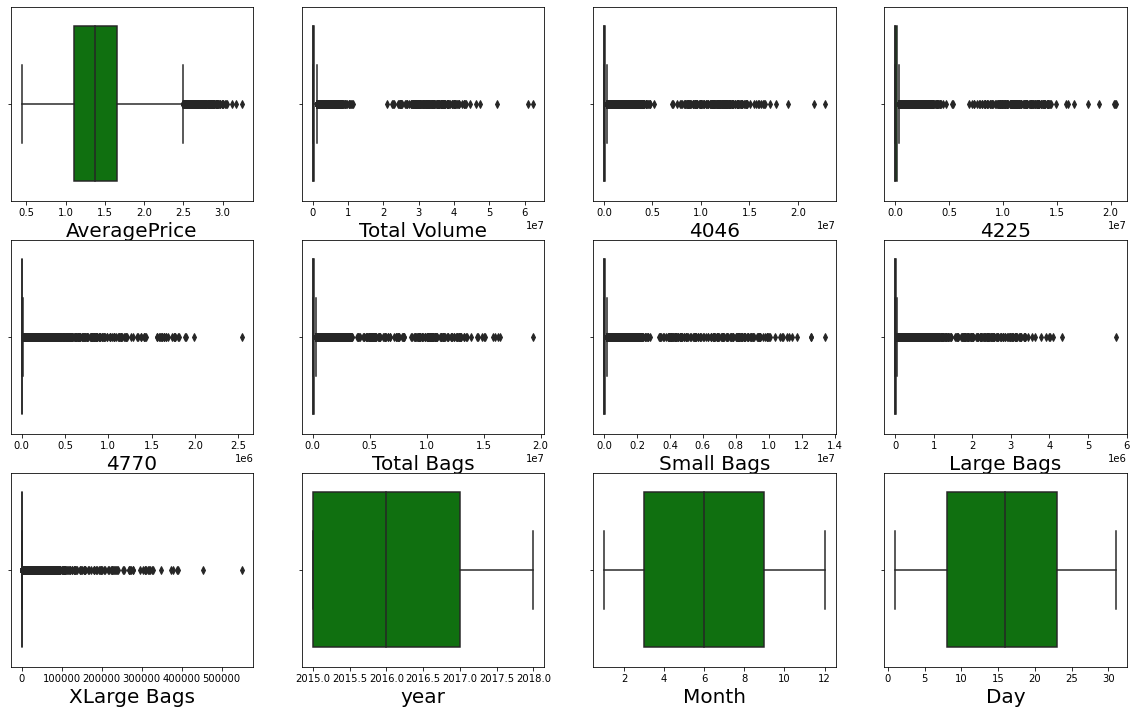

In [17]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Removing Outliers using z-score method

In [19]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [20]:
# Creating new dataframe
new_df1 = df[(z<3).all(axis=1)] 
new_df1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

# Checking for skewness

In [21]:
# Checking the skewness
new_df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Skewness present in some of the feature columns 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'.
so we need to remove the skewness of the dataset.

In [22]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [23]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [24]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Some skewness is still present in the column XLarge Bags. Lets remove the skewness by applying Log transform in 
XLarge Bags column.

In [25]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])

In [26]:
# Let's check the skewness again
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

as Xlarge bags still contains skewness we will drop this irrevelant column.

In [27]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)

In [28]:
new_df1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags          type  year  region  Month  Day  
0   -0.337064   -0.775214  conventional  2015  Albany     12   27  
1   -0.301038   -0.765237  conventional  2015  Albany     12   20  
2   -0.364044   -0.752534  conventional  2015  Albany     12   13  
3   -0.500341   -0.693012  conventional  2015  Albany     12    6  
4   -0.479918   -0.600755  conventional  2015  Albany     11   29

# Encoding the categorical columns using Label Encoding

In [29]:
categorical_col = ["type","region"]

In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)

In [31]:
new_df1[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

Here we have encoded categorical columns type and region by using LabelEncoder.  

# Checking the correlation between features and the target

In [32]:
# Checking the correlation between features and the target
cor = new_df1.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags      type      year  \
AveragePrice   -0.564616   -0.493621   -0.477879  0.608447  0.099910   
Total Volume    0.939776    0.905098    0.681427 -0.800828  0.076584   
4046            0.799354    0.778765    0.601899 -0.725826 -0.002396   
4225            0.818511    0.784901    0.614878 -0.747722 -0.004533   
4770            0.761641    0.754305    0.548457 -0.780988 -0.051657   
Total Bags      1.000000    0.949901    0.729652 -0.725686  0.210924   
Small Bags      0.949901    1.000000    0.566307 -0.720466  0.185955   
Large Bags      0.729652    0.566307    1.000000 -0.500026  0.190295   
type           -0.725686   -0.720466   -0.500026  1.000000  0.007399   
year            0.210924    0.185955    0.190295  0.007399  1.000000   
region          0.065996    0.051985    0.086573  0.021970 -0.003610   
Month          -0.014571   -0.010260   -0.016942 -0.005044 -0.173166   
Day            -0.003703   -0.000535   -0.000876 -0.002469  0.004044   

                region     Month       Day  
AveragePrice  0.010428  0.157900  0.024742  
Total Volume  0.065709 -0.026332 -0.006248  
4046          0.159390 -0.025919 -0.004558  
4225          0.032273 -0.024708 -0.005919  
4770          0.037805 -0.017377  0.001383  
Total Bags    0.065996 -0.014571 -0.003703  
Small Bags    0.051985 -0.010260 -0.000535  
Large Bags    0.086573 -0.016942 -0.000876  
type          0.021970 -0.005044 -0.002469  
year         -0.003610 -0.173166  0.004044  
region        1.000000  0.002175  0.000751  
Month         0.002175  1.000000  0.010456  
Day           0.000751  0.010456  1.000000

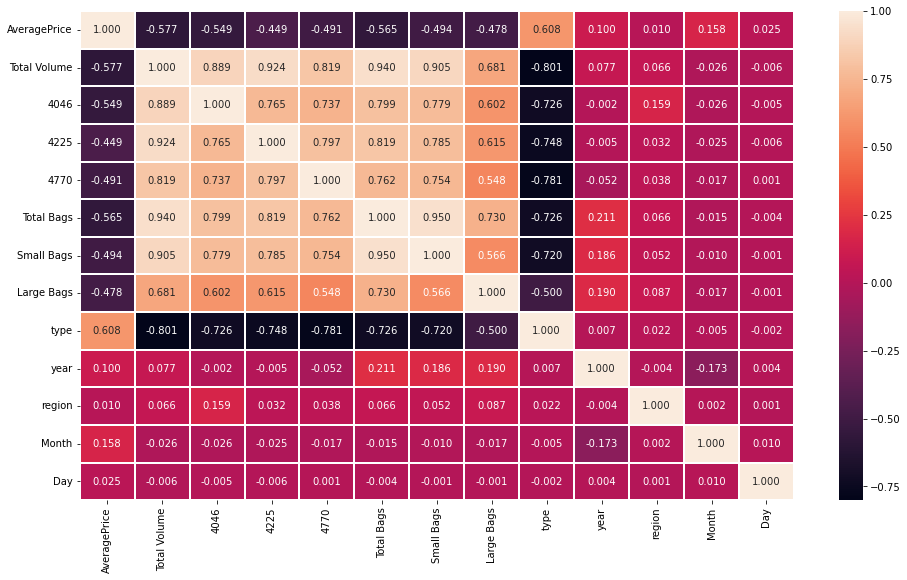

In [33]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

In [34]:
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Day             0.000751
year           -0.003610
Name: region, dtype: float64

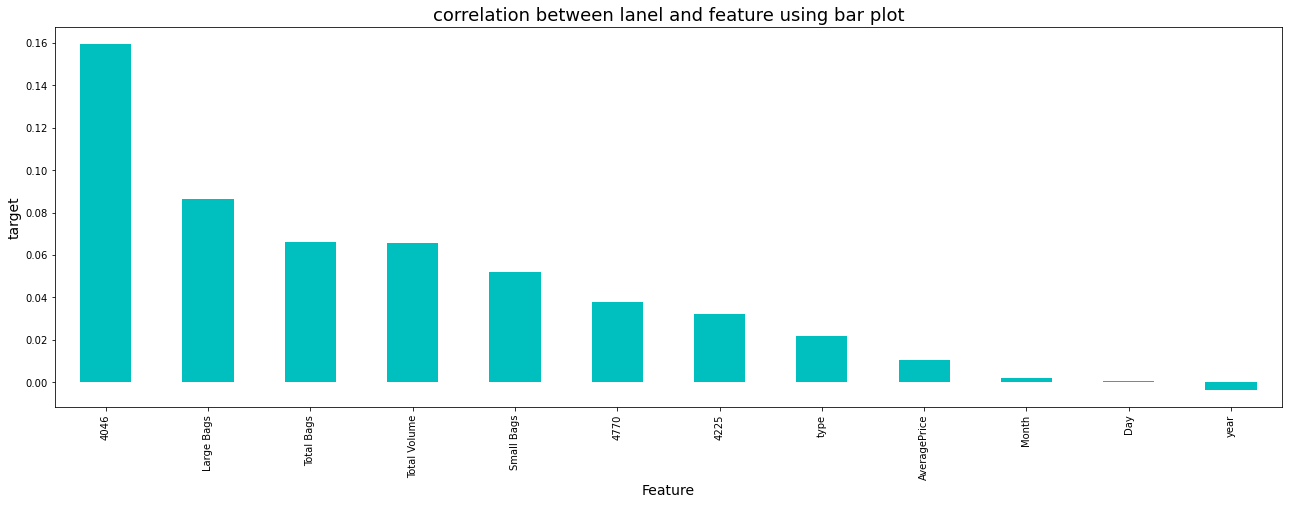

In [35]:
plt.figure(figsize=(22,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

We can conclude that month, day and year column have very less corelation with target variable. so lets drop these columns.

In [36]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Day",axis=1, inplace=True)
new_df1.drop("year",axis=1, inplace=True)

In [37]:
new_df1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  type  region  
0   -0.337064   -0.775214     0       0  
1   -0.301038   -0.765237     0       0  
2   -0.364044   -0.752534     0       0  
3   -0.500341   -0.693012     0       0  
4   -0.479918   -0.600755     0       0

Separating the features and label variables into x and y

In [38]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]

In [39]:
# Dimension of x
x.shape

(17782, 9)

In [40]:
# Dimension of y
y.shape

(17782,)

In [41]:
y.value_counts()

0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

Here we can notice that the data is not balanced. Let's use oversampling method to balance the data.

# Oversampling the data

In [42]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [43]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

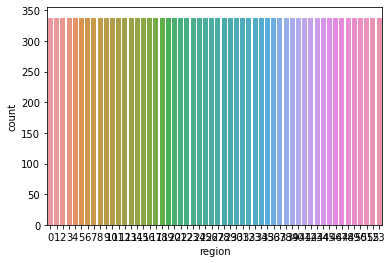

In [44]:
sns.countplot(y)

# Feature Scaling using Standard Scalarization

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.214171     -0.092150 -0.671226  0.329669 -0.228029   -0.551554   
1         -0.164210     -0.163763 -0.790752  0.248317 -0.180733   -0.512836   
2         -1.213392      0.186259 -0.745429  0.625324  0.018023   -0.579930   
3         -0.838684      0.002044 -0.646455  0.446188 -0.126749   -0.724149   
4         -0.339074     -0.196691 -0.698251  0.240980 -0.116093   -0.697846   
...             ...           ...       ...       ...       ...         ...   
18247     -1.307354      1.936616  1.944159  2.020547  1.633789    1.961546   
18248      0.211278      1.850054  1.817126  1.827327  1.414598    2.106194   
18249      0.288682     -0.800435 -0.582007 -0.618923 -0.600991   -0.611114   
18250     -1.012957      1.091199  1.386764  0.620371  1.027903    1.032564   
18251     -1.688021      1.068949  1.392060  0.784430  1.168867    0.711742   

       Small Bags  Large Bags     type  
0       -0.362005   -0.797218 -1.03627  
1       -0.326429   -0.787361 -1.03627  
2       -0.388648   -0.774812 -1.03627  
3       -0.523244   -0.716009 -1.03627  
4       -0.503076   -0.624866 -1.03627  
...           ...         ...      ...  
18247    1.871248    1.954948 -1.03627  
18248    1.951023    2.153796 -1.03627  
18249   -0.416295   -0.823718  0.96500  
18250    0.922100    1.276414 -1.03627  
18251    0.644780    0.989015 -1.03627  

[18252 rows x 9 columns]

# Checking VIF values

In [46]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.940125  AveragePrice
1   54.538525  Total Volume
2    6.882461          4046
3   12.235522          4225
4    3.785318          4770
5   35.661463    Total Bags
6   17.773019    Small Bags
7    3.564750    Large Bags
8    3.456720          type

Some of the columns have VIF values grater than 10, So to remove multicollinearity we need to drop the highest VIF value column i.e. Total Volume column. 

In [47]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [48]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.883667  AveragePrice
1    3.566413          4046
2    4.453965          4225
3    3.770295          4770
4   26.533822    Total Bags
5   17.764441    Small Bags
6    3.509893    Large Bags
7    3.361166          type

Here the VIF values of Total Bags and Small Bags are still greater than 10, So need to drop one of the column.

In [49]:
# Dropping the feature Total Volume
x.drop("Total Bags",axis=1, inplace=True)

In [50]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.783291  AveragePrice
1    3.565691          4046
2    4.262816          4225
3    3.766340          4770
4    3.574024    Small Bags
5    1.896546    Large Bags
6    3.348720          type

So here data cleaning done.

In [51]:
# DataFrame after preprocessing and data cleaning
x.head()

AveragePrice      4046      4225      4770  Small Bags  Large Bags     type
0     -0.214171 -0.671226  0.329669 -0.228029   -0.362005   -0.797218 -1.03627
1     -0.164210 -0.790752  0.248317 -0.180733   -0.326429   -0.787361 -1.03627
2     -1.213392 -0.745429  0.625324  0.018023   -0.388648   -0.774812 -1.03627
3     -0.838684 -0.646455  0.446188 -0.126749   -0.523244   -0.716009 -1.03627
4     -0.339074 -0.698251  0.240980 -0.116093   -0.503076   -0.624866 -1.03627

# Finding best random state

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7934623813002192  on Random_state  14


Best accuracy of the model is  79%  on Random_state  14.

# Creating train_test split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [55]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7821402483564646
[[85  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  3]
 [ 0  0 80 ...  0  0  1]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  0 97  0]
 [ 0  2  3 ...  0  0 68]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       109
           1       0.73      0.76      0.74       101
           2       0.90      0.88      0.89        91
           3       0.79      0.68      0.73       108
           4       0.81      0.82      0.82       116
           5       0.73      0.69      0.71        95
           6       0.99      0.88      0.93       112
           7       0.74      0.82      0.78        91
           8       0.92      0.90      0.91       100
           9       0.74      0.83      0.78        90
          10       0.62      0.65      0.64       107
          11       0.88      0.70      0.78       114
          12       0.81      0.88      0.84        89
          13       0.76      0.71      0.74       105
          14  

Here we are getting 78.2% accuracy using Decision Tree Classifier.

# Random Forest Classifier

In [56]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8915266617969321
[[100   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   1]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ...  95   0   0]
 [  0   0   0 ...   0 102   0]
 [  0   1   3 ...   0   0  74]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       109
           1       0.89      0.88      0.89       101
           2       0.95      0.99      0.97        91
           3       0.96      0.81      0.88       108
           4       0.92      0.90      0.91       116
           5       0.84      0.80      0.82        95
           6       0.99      0.98      0.99       112
           7       0.80      0.95      0.86        91
           8       0.98      0.97      0.97       100
           9       0.89      0.91      0.90        90
          10       0.82      0.88      0.85       107
          11       0.95      0.89      0.92       114
          12       0.94      0.92      0.93        89
          13       0.86      0.8

The accuracy here is 89%

# Logistic Regression Classifier

In [57]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.44868517165814464
[[57  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  1]
 [ 0  0 55 ...  0  0  5]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  1 89  0]
 [ 0  4  1 ...  0  0 13]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.50       109
           1       0.21      0.41      0.28       101
           2       0.53      0.60      0.57        91
           3       0.46      0.33      0.39       108
           4       0.43      0.34      0.38       116
           5       0.40      0.37      0.38        95
           6       0.79      0.81      0.80       112
           7       0.36      0.56      0.44        91
           8       0.62      0.74      0.68       100
           9       0.47      0.73      0.57        90
          10       0.44      0.22      0.30       107
          11       0.52      0.41      0.46       114
          12       0.32      0.45      0.38        89
          13       0.14      0.05      0.07       105
          14 

The accuracy using Logistic regression is 44.8%

# Support Vector Machine Classifier

In [58]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7761139517896275
[[ 98   0   0 ...   0   0   0]
 [  0  55   0 ...   0   0   0]
 [  0   0  79 ...   0   0   0]
 ...
 [  0   0   0 ...  95   0   0]
 [  0   0   0 ...   0 102   0]
 [  0   0   3 ...   0   0  65]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       109
           1       0.54      0.54      0.54       101
           2       0.93      0.87      0.90        91
           3       0.84      0.69      0.76       108
           4       0.91      0.73      0.81       116
           5       0.70      0.53      0.60        95
           6       0.99      0.96      0.97       112
           7       0.67      0.79      0.73        91
           8       0.97      0.97      0.97       100
           9       0.68      0.86      0.75        90
          10       0.59      0.59      0.59       107
          11       0.85      0.77      0.81       114
          12       0.91      0.97      0.93        89
          13       0.60      0.6

The accuracy here is 77%

# KNeighbors Classifier

In [59]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.837655222790358
[[ 96   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   1]
 [  0   0  87 ...   0   0   0]
 ...
 [  0   0   0 ...  95   0   0]
 [  0   0   0 ...   0 102   0]
 [  0   0   0 ...   0   0  79]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       109
           1       0.76      0.83      0.79       101
           2       0.96      0.96      0.96        91
           3       0.84      0.77      0.80       108
           4       0.89      0.87      0.88       116
           5       0.78      0.73      0.75        95
           6       1.00      0.96      0.98       112
           7       0.70      0.93      0.80        91
           8       0.97      0.98      0.98       100
           9       0.75      0.82      0.78        90
          10       0.70      0.69      0.69       107
          11       0.91      0.91      0.91       114
          12       0.92      0.96      0.94        89
          13       0.68      0.74

The accuracy using KNN is 84%

# Gradient Boosting Classifier

In [60]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8139152666179693
[[84  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  3]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  0 99  0]
 [ 0  0  1 ...  0  0 71]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       109
           1       0.77      0.69      0.73       101
           2       0.94      0.93      0.94        91
           3       0.84      0.77      0.80       108
           4       0.84      0.80      0.82       116
           5       0.77      0.73      0.75        95
           6       0.98      0.93      0.95       112
           7       0.79      0.87      0.83        91
           8       0.98      0.94      0.96       100
           9       0.82      0.84      0.83        90
          10       0.69      0.77      0.73       107
          11       0.88      0.70      0.78       114
          12       0.87      0.91      0.89        89
          13       0.73      0.80      0.76       105
          14  

The accuracy using Gradient boosting classifier is 81%

# AdaBoost Classifier

In [61]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.04620160701241782
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  2  0  0]
 ...
 [ 0  0  0 ... 89  0  0]
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  7  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        91
           3       0.25      0.01      0.02       108
           4       0.00      0.00      0.00       116
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00       112
           7       0.04      1.00      0.09        91
           8       0.22      0.02      0.04       100
           9       0.04      0.48      0.07        90
          10       0.00      0.00      0.00       107
          11       0.00      0.00      0.00       114
          12       0.00      0.00      0.00        89
          13       0.00      0.00      0.00       105
          14 

# Checking the Cross Validation Score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.588370099391047


In [64]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6970125805277594


In [65]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.3606739080679716


In [66]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6408534047718208


In [67]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.6407430052941021


In [68]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.061420155108564745


From the accuracy score and cross validation score i am choosing Random Forest Classifier as best model.

# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [71]:
GCV=GridSearchCV(rfc,parameters,cv=5)

In [72]:
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'sqrt', 'n_estimators': 150}


In [73]:
region = RandomForestClassifier(max_features='auto',n_estimators=150 )
region.fit(x_train, y_train)
pred = region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.572680788897


The accuracy of the best model increased after tuning and giving 89.57% accuracy.

# Saving the model

In [75]:
# Saving the model using .pkl
import joblib
joblib.dump(region,"Avacado_region.pkl")

['Avacado_region.pkl']

# Predicting the saved model

In [76]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([25, 24, 16, ...,  2, 34, 24])

# These are the predicted region rate values.

In [77]:
finaldf=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
finaldf

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    25    24    16    27    11    15    47    27    28    26  ...   
Original     25    24    16    27    11    15    23    27    28    26  ...   

           5466  5467  5468  5469  5470  5471  5472  5473  5474  5475  
Predicted    28    37    50    46    21    14    46     2    34    24  
Original     28    37    50    46    21    14    46     2    34    50  

[2 rows x 5476 columns]

we can see thar predicted and original values are same.

# ROC- AUC curve

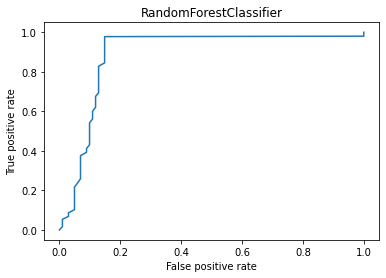

In [78]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

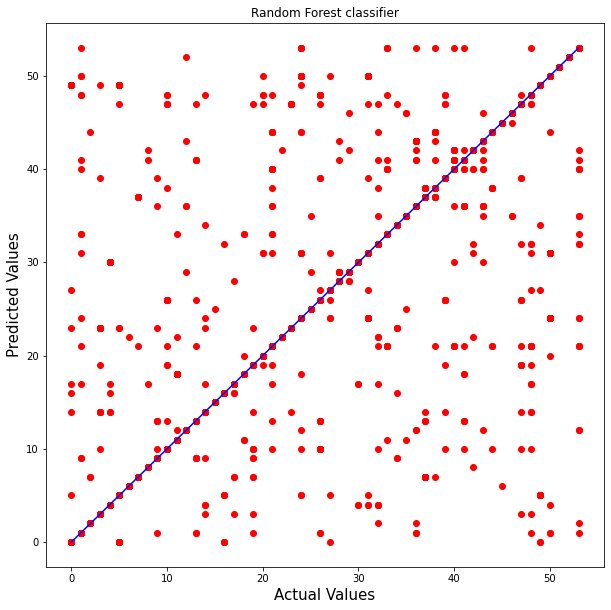

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

Concluding Remarks

1.In addition, the score value of R2 is also greater than the accuracy score.

2.The average price, the total exchanges and the total volume are well distributed among all the other columns

3.There are no outliers in the dataset after replacing it with the mean value.

4.Since year is the most negatively correlated column of all columns.

5.Between August and October the price of avocado is much higher compared to other months.

6.Hartford Springfield, San Francisco and New York are having more average price as compared to another region.

7.As organic type of avocado is having the more price per unit then conventional.

I had done prediction using region and price but using price the prediction score is high as compared to region.

So in this data set we are using both regression and classification technique for making this model.